In [1]:
import pandas as pd
stk_data = pd.read_csv("Tatacoffee13_21.csv")

In [2]:
column = "Close"
exog_column = "Open"


In [3]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data[[column]])

In [4]:
Ms_exog = MinMaxScaler()
exog_data = Ms_exog.fit_transform(stk_data[[exog_column]])

In [5]:
print("Len:", data1.shape)

Len: (2225, 1)


In [6]:
# Define orders to test
orders = [(1,0,2),(1,0,1),(2,0,1),(1,0,1)]

In [7]:
for i in orders:
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, exog=exog_data, order=i)  # ARIMAX now
    model_fit = model.fit()
    
    # Make prediction on the full data
    y_pred = model_fit.predict(0, len(data1)-1, exog=exog_data)
    
    from stockFunctions import rmsemape
    rmsemape(data1, y_pred)

RMSE-Testset: 0.007272026040129473
maPe-Testset: 5992846496.810262
RMSE-Testset: 0.00728650757926512
maPe-Testset: 5753008985.15412
RMSE-Testset: 0.00728996194472445
maPe-Testset: 5600358980.392219
RMSE-Testset: 0.00728650757926512
maPe-Testset: 5753008985.15412


In [9]:
model = ARIMA(data1, exog=exog_data, order=(2,0,1))  # ARIMAX for the best order
model_fit = model.fit()

# Make prediction on the full data
y_pred = model_fit.predict(0, len(data1)-1, exog=exog_data)

from stockFunctions import rmsemape
rmsemape(data1, y_pred)

RMSE-Testset: 0.00728996194472445
maPe-Testset: 5600358980.392219


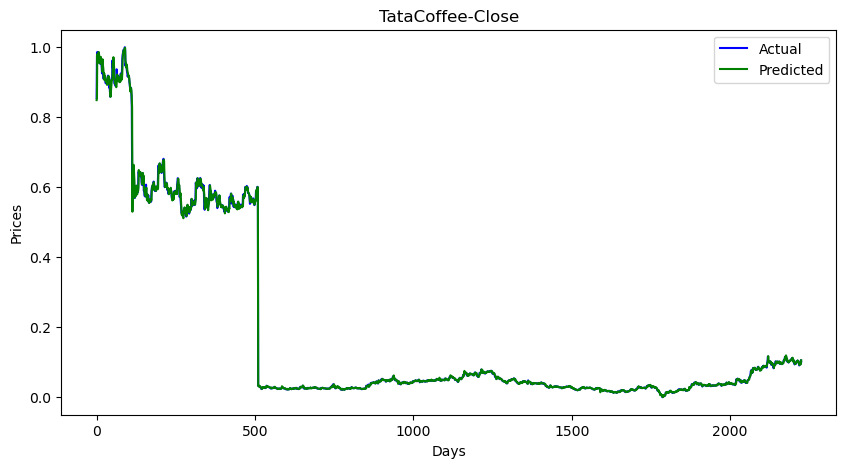

In [10]:
from stockFunctions import graph
graph(data1, y_pred, "Actual", "Predicted", "TataCoffee-Close", "Days", "Prices")

In [11]:
# Convert normalized data back to original scale
from stockFunctions import conversionSingle
aTestNormTable = conversionSingle(data1, ["Close"])
actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori, ["Close"])

In [12]:
pTestNormTable = conversionSingle(y_pred, ["Close"])
predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = conversionSingle(predicted_stock_price_test_ori, ["Close"])

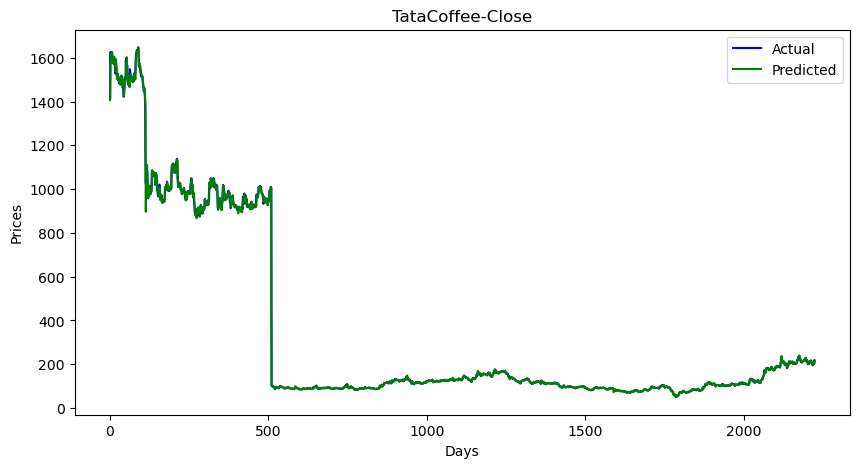

In [13]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA, predicted_stock_price_test_oriP,"Actual", "Predicted", "TataCoffee-Close", "Days", "Prices")

In [14]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)

RMSE-Testset: 11.655191157225453
maPe-Testset: 0.014623123876594661


In [16]:
# number of future steps you want to forecast (example: 4)
n_forecast = 4
import numpy as np
last_exog = exog_data[-1].reshape(1, -1)        # shape (1, n_exog_cols)
future_exog = np.repeat(last_exog, n_forecast, axis=0)  # shape (n_forecast, n_exog_cols)

In [18]:
forecast_scaled = model_fit.predict(len(data1),len(data1)+n_forecast-1,exog=future_exog)

# If you want to see the scaled forecast
print("Scaled forecast:", forecast_scaled)

Scaled forecast: [0.10572029 0.10633894 0.10620504 0.10615995]


In [19]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast_scaled ,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [20]:
forecast_stock_price_test_oriF

,Closefore
0,218.425595
1,219.414701
2,219.20061
3,219.128531
